Code made by Otto

In [42]:
import pandas as pd
import numpy as np

### Loading the dataset

In [43]:
# Loading our cleaned dataset
df = pd.read_csv('combined_themepark_dataset.csv')

# Displaying the data
print(df)

                   date                                    profile  \
0      12/31/23 9:40 PM                 wild adventures theme park   
1      12/31/23 8:01 PM                           fun spot america   
2      12/31/23 7:30 PM                           fun spot america   
3      12/31/23 7:00 PM                           disneyland paris   
4      12/31/23 7:00 PM                      silverwood theme park   
...                 ...                                        ...   
14904  01/01/2023 02:00                 wild adventures theme park   
14905  01/01/2023 01:20                                   playland   
14906  01/01/2023 00:01                           disneyland paris   
14907  01/01/2023 00:00  six flags over georgia & hurricane harbor   
14908  01/01/2023 00:00                         knott's berry farm   

                                                 message  nr_reactions  \
0      🎟️🚨 Today's the FINAL day to use your 2023 Sea...            16   
1      See 

### Checking for null values

In [44]:
#Checking for null values
null_values_df = pd.DataFrame({
    'Variable Name': df.columns,
    'Null Values': df.isnull().sum()
})

print(null_values_df)

                               Variable Name  Null Values
date                                    date            0
profile                              profile            0
message                              message            0
nr_reactions                    nr_reactions            0
nr_comments                      nr_comments            0
nr_shares                          nr_shares            0
comments/post                  comments/post            0
post_interaction_rate  post_interaction_rate        12133
nr_likes                            nr_likes            0
link_posts                        link_posts        14370
picture_posts                  picture_posts         3712
video_posts                      video_posts        12573
profile_id                        profile_id            0
post_id                              post_id            0
link                                    link            0
followers                          followers            0
engagement    

### Calculating message sentiment with Textblob library

In [45]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(message):
    blob = TextBlob(message)
    return blob.sentiment.polarity

# Apply sentiment analysis to the message column
df['sentiment'] = df['message'].apply(get_sentiment)

# Display the updated DataFrame
print(df)

                   date                                    profile  \
0      12/31/23 9:40 PM                 wild adventures theme park   
1      12/31/23 8:01 PM                           fun spot america   
2      12/31/23 7:30 PM                           fun spot america   
3      12/31/23 7:00 PM                           disneyland paris   
4      12/31/23 7:00 PM                      silverwood theme park   
...                 ...                                        ...   
14904  01/01/2023 02:00                 wild adventures theme park   
14905  01/01/2023 01:20                                   playland   
14906  01/01/2023 00:01                           disneyland paris   
14907  01/01/2023 00:00  six flags over georgia & hurricane harbor   
14908  01/01/2023 00:00                         knott's berry farm   

                                                 message  nr_reactions  \
0      🎟️🚨 Today's the FINAL day to use your 2023 Sea...            16   
1      See 

In [46]:
column_names = df.columns
print(column_names)

Index(['date', 'profile', 'message', 'nr_reactions', 'nr_comments',
       'nr_shares', 'comments/post', 'post_interaction_rate', 'nr_likes',
       'link_posts', 'picture_posts', 'video_posts', 'profile_id', 'post_id',
       'link', 'followers', 'engagement', 'sentiment'],
      dtype='object')


In [47]:
#Looking at the necesssary columns for the subsequent analysis
df[['message', 'sentiment', 'engagement']]

,message,sentiment,engagement
0,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,0.317857,17.083333
1,See you next year! 😉 Don’t miss...,0.200000,35.000060
2,Don't miss our HUGE firework display ! 🥳\r\n\r...,0.500000,25.000090
3,Fijne jaarwisseling! 🥂🎉\r\nEn tot volgend jaar 😉,0.000000,582.000007
4,It's the last day of our New Year's Sale! Save...,0.129545,20.000000
...,...,...,...
14904,LAST CHANCE! \r\n\r\nPrices on 2023 Season Pas...,0.304167,22.000000
14905,O Grupo Playcenter e os Parques Playcenter Fam...,0.000000,9.000000
14906,Gelukkig 2023! Laat de magie dit jaar stralen ...,0.000000,701.000018
14907,What are your 2023 New Years resolutions? ✨\r\...,0.443182,63.000013


### Checking data types

In [48]:
#Checking the data types of the columns
column_dtypes = df.dtypes
print(column_dtypes)

date                      object
profile                   object
message                   object
nr_reactions               int64
nr_comments                int64
nr_shares                  int64
comments/post              int64
post_interaction_rate    float64
nr_likes                   int64
link_posts               float64
picture_posts            float64
video_posts              float64
profile_id                object
post_id                   object
link                      object
followers                 object
engagement               float64
sentiment                float64
dtype: object


### Diving into negative sentiments and determining if they are going to be used or not

In [49]:
#Seeing if there are negative values in the sentiment column
negative_sentiments = df[df['sentiment'] < 0]
if not negative_sentiments.empty:
    print("There are negative values in the sentiment column.")
else:
    print("There are no negative values in the sentiment column.")

There are negative values in the sentiment column.


In [50]:
#Seeing the number of negative sentiments
negative_count = negative_sentiments[negative_sentiments['sentiment'] < 0]['sentiment'].count()
print(negative_count)

846


In [51]:
#Looking at the messages with alleged negative sentiment to see if it is determined correctly
negative_messages = negative_sentiments['message']
print(negative_messages)


43       A round of applause to TKO Valdosta Nissan and...
56       🎁 Let the gift-giving continue! Get unlimited ...
69       Due to the inclement weather, Gilroy Gardens w...
96       Experience the all-new #TopThrill2 next season...
106      Due to the high surf advisory and evacuations ...
                               ...                        
14775    PLAYLAND CENTER NORTE\r\n\r\nAlô, alô #ZonaNor...
14796    Warning: watching this will give you serious F...
14807    SAVE THE DATE for our Fire & Ice Festival on S...
14828    Due to inclement weather, we will close the pa...
14883    That moment you come face to fang on Cobra's C...
Name: message, Length: 846, dtype: object


In [52]:
import nltk
nltk.download('punkt')
nltk.download('brown')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ottok\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\ottok\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

Checking words and phrases in the negative sentiment messages and also comparing them to positive sentiment messages

In [53]:
from collections import Counter

# Filter the negative sentiment messages
negative_messages = df[df['sentiment'] < 0]['message']

# Create a list to store all words and phrases
all_words = []
all_phrases = []

# Iterate over each negative message
for message in negative_messages:
    # Create a TextBlob object for the message
    blob = TextBlob(message)
    
    # Tokenize the message into words and phrases
    words = blob.words
    phrases = blob.noun_phrases
    
    # Add the words and phrases to the list
    all_words.extend(words)
    all_phrases.extend(phrases)

# Count the frequencies of words and phrases
word_frequencies = Counter(all_words)
phrase_frequencies = Counter(all_phrases)

# Display the word frequencies
print("Word Frequencies:")
for word, frequency in word_frequencies.most_common():
    print(f"{word}: {frequency}")

# Display the phrase frequencies
print("\nPhrase Frequencies:")
for phrase, frequency in phrase_frequencies.most_common():
    print(f"{phrase}: {frequency}")

Word Frequencies:
the: 937
to: 707
and: 586
a: 460
for: 431
of: 415
at: 350
you: 349
in: 293
on: 268
our: 265
will: 232
is: 232
's: 223
be: 219
’: 216
your: 213
with: 189
https: 188
this: 175
We: 143
are: 136
The: 135
today: 130
park: 119
we: 119
all: 113
from: 107
us: 105
as: 103
up: 97
tickets: 97
s: 96
it: 94
day: 92
or: 90
weather: 88
now: 84
can: 81
open: 79
that: 79
n't: 77
weekend: 76
out: 75
down: 73
Friday: 71
closed: 69
get: 67
through: 66
by: 66
have: 64
Sunday: 64
only: 63
Due: 61
time: 61
Saturday: 61
before: 61
Pass: 59
inclement: 56
into: 54
2023: 53
season: 52
Park: 52
here: 51
Season: 51
Get: 50
do: 50
no: 50
an: 48
see: 47
one: 46
Disney: 46
Day: 46
Do: 45
any: 45
ride: 45
tomorrow: 43
Halloween: 42
visit: 41
little: 41
Knott: 41
It: 40
Our: 40
Join: 40
next: 39
just: 39
when: 39
t: 39
Tickets: 38
during: 38
long: 38
Fest: 38
like: 37
not: 37
rides: 36
limited: 36
e: 36
de: 36
re: 35
miss: 35
Farm: 35
save: 34
're: 34
purchase: 34
event: 34
This: 34
October: 34
their:

In [54]:
# Display the phrase frequencies
print("\nPhrase Frequencies:")
for phrase, frequency in phrase_frequencies.most_common():
    print(f"{phrase}: {frequency}")


Phrase Frequencies:
’ s: 65
inclement weather: 56
join: 38
tickets: 37
knott: 37
october: 32
june: 32
’ re: 30
december: 28
grab: 28
april: 28
september: 27
’ t: 25
have: 24
january: 23
scary: 23
mysixflags: 22
pm: 21
disney: 20
flags: 19
black: 19
season pass: 18
fright fest: 18
frightfest: 18
hurry: 17
don: 17
quassy: 17
kingsisland: 16
buy: 16
august: 16
disney+: 15
belmont: 15
november: 15
halloween: 15
may: 15
please: 14
hersheypark: 14
sale: 14
halloween haunt: 14
thank: 13
’ ll: 13
georgia: 13
diversao: 13
march: 13
july: 13
's #: 12
playland: 12
pass: 11
cedar: 11
arcade: 11
season passes: 11
phantom: 11
berry: 11
oct.: 11
soak: 11
waterpark: 11
head: 10
who: 10
save: 10
click: 10
dive: 10
attention: 10
fest: 10
california: 10
knottsberryfarm: 10
gilroy gardens: 9
dec: 9
compounce: 9
haunted: 9
offer: 9
ca n't: 9
oktoberfest: 9
nights: 9
new: 9
comment: 9
san diego: 9
sixflagsmemories: 9
select california marketplace: 9
buy now: 8
holiday: 8
boardwalk: 8
’ ve: 8
myhurricanehar

In negative sentiment we see phrases like 'scary' and 'black' but nothing to really determine that the messages are indeed with negative sentiment

In [55]:
from collections import Counter

# Filter the positive sentiment messages
positive_messages = df[df['sentiment'] > 0]['message']

# Create a list to store all words and phrases
all_words = []
all_phrases = []

# Iterate over each positive message
for message in negative_messages:
    # Create a TextBlob object for the message
    blob = TextBlob(message)
    
    # Tokenize the message into words and phrases
    words = blob.words
    phrases = blob.noun_phrases
    
    # Add the words and phrases to the list
    all_words.extend(words)
    all_phrases.extend(phrases)

# Count the frequencies of words and phrases
word_frequencies = Counter(all_words)
phrase_frequencies = Counter(all_phrases)

# Display the word frequencies
print("Word Frequencies:")
for word, frequency in word_frequencies.most_common():
    print(f"{word}: {frequency}")

# Display the phrase frequencies
print("\nPhrase Frequencies:")
for phrase, frequency in phrase_frequencies.most_common():
    print(f"{phrase}: {frequency}")

Word Frequencies:
the: 937
to: 707
and: 586
a: 460
for: 431
of: 415
at: 350
you: 349
in: 293
on: 268
our: 265
will: 232
is: 232
's: 223
be: 219
’: 216
your: 213
with: 189
https: 188
this: 175
We: 143
are: 136
The: 135
today: 130
park: 119
we: 119
all: 113
from: 107
us: 105
as: 103
up: 97
tickets: 97
s: 96
it: 94
day: 92
or: 90
weather: 88
now: 84
can: 81
open: 79
that: 79
n't: 77
weekend: 76
out: 75
down: 73
Friday: 71
closed: 69
get: 67
through: 66
by: 66
have: 64
Sunday: 64
only: 63
Due: 61
time: 61
Saturday: 61
before: 61
Pass: 59
inclement: 56
into: 54
2023: 53
season: 52
Park: 52
here: 51
Season: 51
Get: 50
do: 50
no: 50
an: 48
see: 47
one: 46
Disney: 46
Day: 46
Do: 45
any: 45
ride: 45
tomorrow: 43
Halloween: 42
visit: 41
little: 41
Knott: 41
It: 40
Our: 40
Join: 40
next: 39
just: 39
when: 39
t: 39
Tickets: 38
during: 38
long: 38
Fest: 38
like: 37
not: 37
rides: 36
limited: 36
e: 36
de: 36
re: 35
miss: 35
Farm: 35
save: 34
're: 34
purchase: 34
event: 34
This: 34
October: 34
their:

After comparing the words and phrases and looking into negative sentiment messages, it is determined that they are not really negative and our hypothesis will focus mostly on the comparison of neutral and positive sentiment

In [56]:
# Check for null values in each DataFrame
null_values_df = pd.DataFrame({
    'Variable Name': df.columns,
    'Null Values': df.isnull().sum()
})

print(null_values_df)

                               Variable Name  Null Values
date                                    date            0
profile                              profile            0
message                              message            0
nr_reactions                    nr_reactions            0
nr_comments                      nr_comments            0
nr_shares                          nr_shares            0
comments/post                  comments/post            0
post_interaction_rate  post_interaction_rate        12133
nr_likes                            nr_likes            0
link_posts                        link_posts        14370
picture_posts                  picture_posts         3712
video_posts                      video_posts        12573
profile_id                        profile_id            0
post_id                              post_id            0
link                                    link            0
followers                          followers            0
engagement    

### Seeing the correlation between sentiment and engagement

In [57]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(df['sentiment'], df['engagement'])

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

Correlation coefficient: -0.04437456125809357
P-value: 5.944695275308907e-08


We can determine that there is no correlation between sentiment and engagement

### Plotting distributions

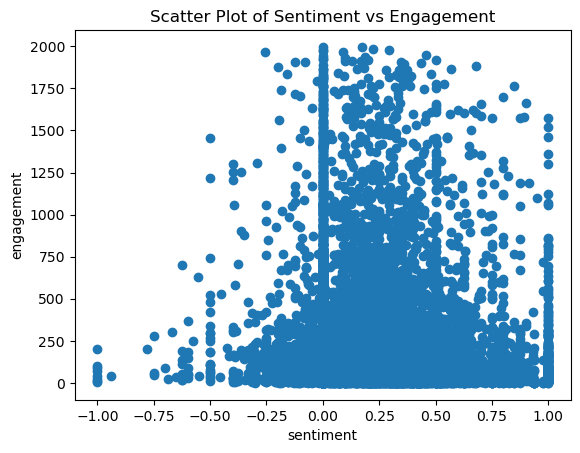

In [58]:
import matplotlib.pyplot as plt

plt.scatter(df['sentiment'], df['engagement'])
plt.xlabel('sentiment')
plt.ylabel('engagement')
plt.title('Scatter Plot of Sentiment vs Engagement')
plt.show()

Scatterpplot shows no linear relationship between sentiment and engagement

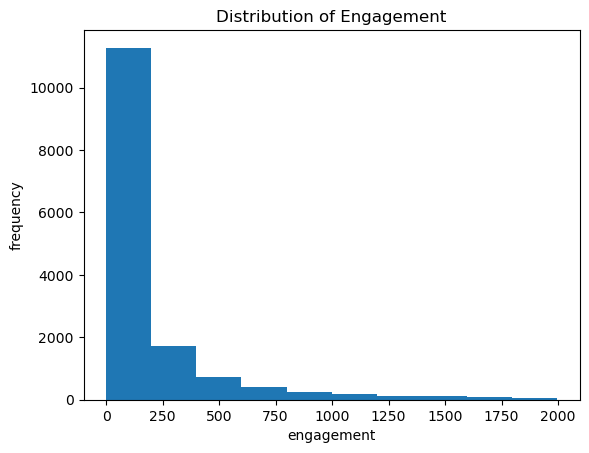

In [59]:
#Checking the distribution of engagement
plt.hist(df['engagement'], bins=10)
plt.xlabel('engagement')
plt.ylabel('frequency')
plt.title('Distribution of Engagement')
plt.show()

We determine that engagement does not have a normal distribution

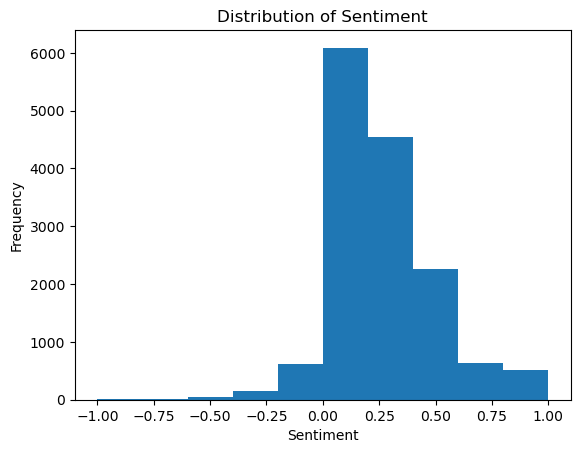

In [60]:
#Checking the distribution of sentiment
plt.hist(df['sentiment'], bins=10)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment')
plt.show()

We determine that sentiment is mostly positive or neutral

### Analysis

Next we run Kruskal-Wallis to answer our hypothesis (since the assumption of normal distribution was not met to run ANOVA). **H3a: There is a significant difference in engagement levels among posts with all the different sentiment tones.**

In [61]:
from scipy.stats import kruskal

# Filter the DataFrame for each sentiment category
neutral_engagement = df[df['sentiment'] == 0]['engagement']
positive_engagement = df[df['sentiment'] > 0]['engagement']
negative_engagement = df[df['sentiment'] < 0]['engagement']

# Run the Kruskal-Wallis test
statistic, p_value = kruskal(neutral_engagement, positive_engagement, negative_engagement)

# Print the test statistic and p-value
print("Test Statistic:", statistic)
print("P-value:", p_value)

Test Statistic: 19.705934105174645
P-value: 5.259092126789327e-05


Based on the Kruskal-Wallis results, we can say there is indeed a significant  difference in engagement levels among posts with all the different sentiment tones, so we reject the null hypothesis of that there is no difference.

Next we perform a Mann-Whitney U test to determine if there is a statistically significant difference in engagement between positive message sentiment and neutral message sentiment to answer our next hypothesis. **H3b: There is a difference in engagement levels between posts with neutral sentiment and posts with positive sentiment.**

In [62]:
from scipy.stats import mannwhitneyu

# Filter the DataFrame for sentiment with neutral scores
neutral_engagement = df[df['sentiment'] == 0]['engagement']

# Filter the DataFrame for sentiment with positive scores
positive_engagement = df[df['sentiment'] > 0]['engagement']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(neutral_engagement, positive_engagement)

# Print the test statistic and p-value
print("Test Statistic:", statistic)
print("P-value:", p_value)

Test Statistic: 18597320.0
P-value: 0.33386851564076325


So the Mann-Whitney U test has returned a p-value of 0.33. Therefore, we fail to reject the null hypothesis. This means that based on the data, there is not enough evidence to conclude that there is a statistically significant difference in engagement between posts with neutral sentiment and posts with positive sentiment.

I also want to calculate the Common Language Effect to get a better sense of how the groups differ.

In [63]:
def cles_ind(x1, x2):
    """Calculate Common Language Effect Size Indicator for independent groups.
    Arguments:
    x1, x2: Arrays of values for two groups
    Returns:
    cles: Common Language Effect Size
    """
    x1 = np.array(x1)
    x2 = np.array(x2)
    diff = x1[:, None] - x2
    cles = (diff > 0).sum() / diff.size
    return cles

# Calculate the Common Language Effect Size
cles = cles_ind(neutral_engagement, positive_engagement)

print("Common Language Effect Size:", cles)

Common Language Effect Size: 0.5048819486156447


This value is close to 0.5, which suggests that there is a roughly equal chance of an observation from either group being higher. This aligns with the results of the Mann-Whitney U test, which suggested that there is not a statistically significant difference in engagement between posts with neutral sentiment and posts with positive sentiment.

### Sentiment to categorical

Next I want to change numerical values of sentiment to either negative, positive or neutral. I recognize that in common practice this is not a good approach because data will be lost in the conversion, but I am doing this for better interpretation in subsequent multilevel analysis.

In [64]:
df['sentiment'] = df['sentiment'].apply(lambda x: 'neutral' if x == 0 else 'positive' if x > 0 else 'negative')

In [65]:
df[['message', 'sentiment']]

,message,sentiment
0,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,positive
1,See you next year! 😉 Don’t miss...,positive
2,Don't miss our HUGE firework display ! 🥳\r\n\r...,positive
3,Fijne jaarwisseling! 🥂🎉\r\nEn tot volgend jaar 😉,neutral
4,It's the last day of our New Year's Sale! Save...,positive
...,...,...
14904,LAST CHANCE! \r\n\r\nPrices on 2023 Season Pas...,positive
14905,O Grupo Playcenter e os Parques Playcenter Fam...,neutral
14906,Gelukkig 2023! Laat de magie dit jaar stralen ...,neutral
14907,What are your 2023 New Years resolutions? ✨\r\...,positive


## **Exporting the dataframe for further analysis**
To work on our multilevel analysis, we will now create a new csv version of the dataframe, which includes the two features that have been created in this notebook (has_emoji, emoji_type).

In [66]:
import os

# Get the directory of the current Jupyter Notebook file
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Specify the name of the folder within the repository
folder_name = '02_new dataframes'

# Construct the full path to the folder within the repository
folder_path = os.path.join(notebook_directory, folder_name)

# Define the file path for the CSV file within the folder
csv_file_path = os.path.join(folder_path, 'H3_dataframe.csv')

# Save the updated DataFrame to a CSV file in the specified folder
df.to_csv(csv_file_path, index=False)